Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
SVM             DM       0.9643      0.9958      0.9959           0.9631           0.9795
SVM             CG       0.9958      0.9643      0.9631           0.9959          


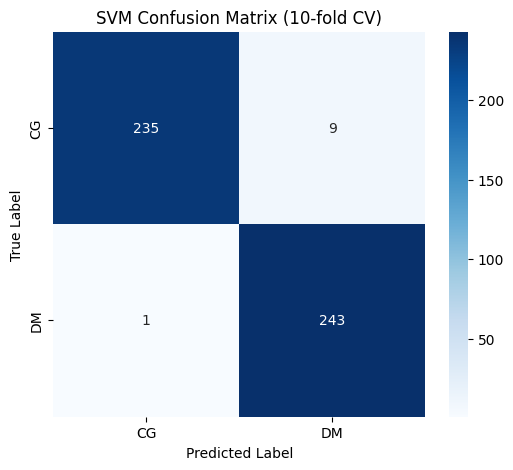

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_efficientnetb0_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM and parameter grid for Grid Search
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf'
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use accuracy as the scoring metric
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_svm = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(best_svm, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'SVM':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'SVM':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix (10-fold CV)")
plt.show()


KNN

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
KNN             DM       0.7948      1.0000      1.0000           0.7418           0.8709
KNN             CG       1.0000      0.7948      0.7418           1.0000          


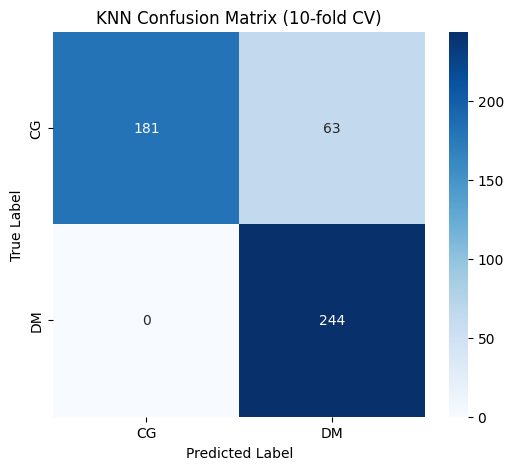

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_efficientnetb0_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define KNN and parameter grid for Grid Search
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # You can adjust this range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_knn = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_knn, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'KNN':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'KNN':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix (10-fold CV)")
plt.show()


DT

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
DT              DM       0.8785      0.8880      0.8893           0.8770           0.8832
DT              CG       0.8880      0.8785      0.8770           0.8893          


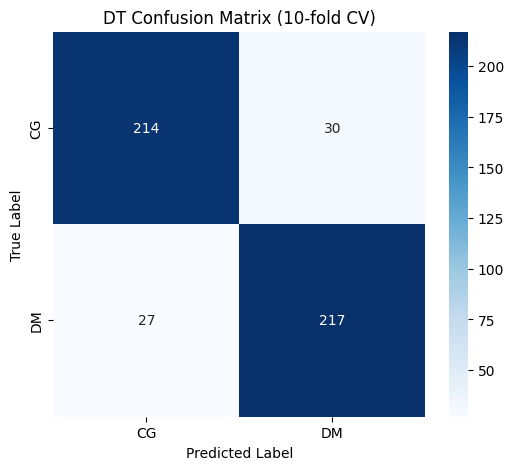

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_efficientnetb0_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Decision Tree and parameter grid for Grid Search
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_dt = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_dt, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'DT':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'DT':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("DT Confusion Matrix (10-fold CV)")
plt.show()


LDA

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 716, in fit
    self._solve_eigen(
  File

Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
LDA             DM       0.8872      0.9307      0.9344           0.8811           0.9078
LDA             CG       0.9307      0.8872      0.8811           0.9344          


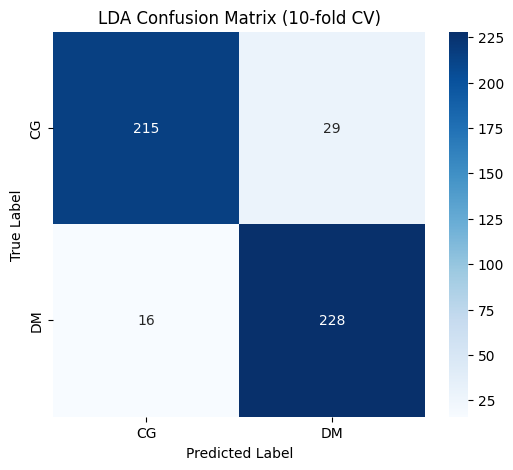

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_efficientnetb0_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define LDA and parameter grid for Grid Search
lda = LinearDiscriminantAnalysis()
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=lda,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_lda = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_lda, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'LDA':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'LDA':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LDA Confusion Matrix (10-fold CV)")
plt.show()


NB

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
NB              DM       0.8919      0.9432      0.9467           0.8852           0.9160
NB              CG       0.9432      0.8919      0.8852           0.9467          


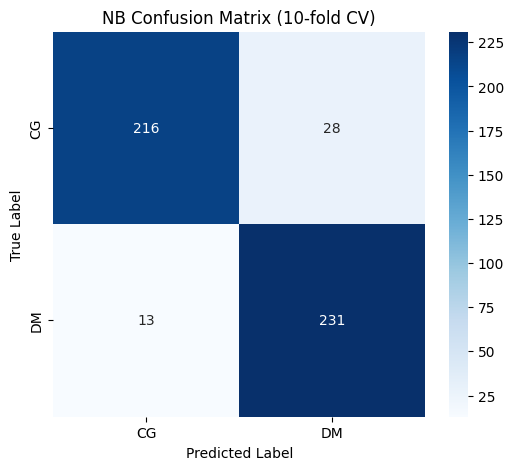

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_efficientnetb0_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define NB and parameter grid for Grid Search
nb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(-9, -6, 4)
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_nb = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_nb, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'NB':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'NB':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("NB Confusion Matrix (10-fold CV)")
plt.show()
